<a href="https://colab.research.google.com/github/ferdouszislam/pytorch-practice/blob/main/ann_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks practice with the MNIST dataset

In [25]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [26]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [27]:
# hyper parameters
input_size = 784 # 28x28
hidden_size = 100 # neurons on hidden layer
num_classes = 10 # 0 to 9
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [28]:
# loading MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, 
                                           transform= transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, 
                                           transform= transforms.ToTensor()) 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [29]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, shuffle=False)

torch.Size([100, 1, 28, 28]) torch.Size([100])


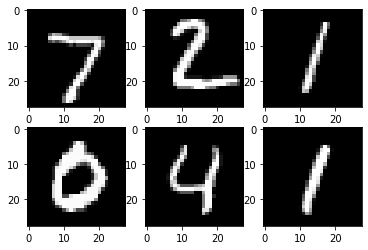

In [30]:
# visualize data
examples = iter(test_loader)
example_data, example_targets = examples.next()
print(example_data.shape, example_targets.shape) # 1 batch = 100 samples
# plot datatset images
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [31]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1= nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)
    
  def forward(self, sample):
    out = self.relu(self.l1(sample))
    out = self.l2(out)
    # do not apply softmax here, 
    # nn.CrossEntropyLoss applies softmax automatically
    return out

In [32]:
# init model
model = NeuralNet(input_size=input_size, hidden_size=hidden_size, 
                  num_classes=num_classes)
model = model.to(device)

# init loss
criterion = nn.CrossEntropyLoss()

# init optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
# training loop
n_total_steps = len(train_loader) # steps for each epoch
for epoch in range(num_epochs):
  for step, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28) # flatten image matrix
    images = images.to(device)
    labels = labels.to(device)

    # forward pass
    output = model(images)
    loss = criterion(output, labels)

    # backpass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (step+1)%100==0:
      print(f'epoch {epoch+1}/{num_epochs}, step {step+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1/10, step 100/600, loss = 0.4914
epoch 1/10, step 200/600, loss = 0.4362
epoch 1/10, step 300/600, loss = 0.2634
epoch 1/10, step 400/600, loss = 0.3349
epoch 1/10, step 500/600, loss = 0.2422
epoch 1/10, step 600/600, loss = 0.2460
epoch 2/10, step 100/600, loss = 0.1551
epoch 2/10, step 200/600, loss = 0.2143
epoch 2/10, step 300/600, loss = 0.1958
epoch 2/10, step 400/600, loss = 0.2116
epoch 2/10, step 500/600, loss = 0.0695
epoch 2/10, step 600/600, loss = 0.1214
epoch 3/10, step 100/600, loss = 0.0736
epoch 3/10, step 200/600, loss = 0.1981
epoch 3/10, step 300/600, loss = 0.1734
epoch 3/10, step 400/600, loss = 0.1996
epoch 3/10, step 500/600, loss = 0.2981
epoch 3/10, step 600/600, loss = 0.0623
epoch 4/10, step 100/600, loss = 0.1010
epoch 4/10, step 200/600, loss = 0.0661
epoch 4/10, step 300/600, loss = 0.0525
epoch 4/10, step 400/600, loss = 0.1136
epoch 4/10, step 500/600, loss = 0.0747
epoch 4/10, step 600/600, loss = 0.1632
epoch 5/10, step 100/600, loss = 0.1218


In [34]:
# test evaluation
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # output(probability)- value, index
    _, pred = torch.max(outputs, 1)

    n_samples += labels.shape[0]
    n_correct += (pred==labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'Test accuracy = {acc:.3f}')

Test accuracy = 97.390
